#0. Librerías y funciones

##0.1. Librerías

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

#!pip install termcolor
from termcolor import colored
import numpy as np
from numpy.core.numeric import NaN

import random

import matplotlib.pyplot as plt
import math as m
import scipy as sc

import seaborn as sns

from google.colab import files

##0.2. Funciones

In [2]:
# Creación de la variable objetivo binaria 'sold'
def to_sold(v):
  if v == 0: x = 0
  else: x = 1
  return x

# Visualizar el balanceo del dataset
def sdp_show(df):
  a = pd.DataFrame(pd.crosstab(df.sold, columns = 'count'))
  b = round(pd.crosstab(df.sold, columns = 'count')/len(df)*100, 2)
  c = pd.merge(a, b, how = 'left', on = 'sold')
  c.columns = pd.Index(['count', 'percent'], dtype='object', name='col_0')
  print(c)
  print('Length:', len(df))
  print('')

#1. Lectura de `train_t.csv`

In [3]:
%%capture
# Definir el directorio de drive en el que está el dataset
directorio_dataset = '/content/drive/MyDrive/TFM Big Data & BA/Propuestas/Proyecto Final/0 - Dataset/train_t.csv'

# Leemos el dataset
df = pd.read_csv(directorio_dataset)

#2. Selección de variables iniciales

In [4]:
# Selección de variables
df = df[['item_id', 'price', 'user_type', 'deal_probability', 'cat_category_name', 'cat_param_1', 'cat_city', 'cat_region', 'image', 'description', 'title']]
df.columns = ['id', 'price', 'user_type', 'deal_probability', 'category', 'subcategory', 'city', 'region', 'image', 'description', 'title']

#3. Duplicados, nulos y formatos

##3.1. Registros duplicados

In [5]:
# Registros duplicados
if df.duplicated().sum() == 0: print(colored('Registros duplicados:', 'blue', attrs=['bold']), df.duplicated().sum(), '\n')
else: print(colored('Existen duplicados:', 'blue', attrs=['bold']), df.duplicated().sum(), '\n')

Registros duplicados: 0 



##3.2. Valores nulos

In [6]:
# Detección de nulos no NaN
print(colored('Existen', 'blue', attrs=['bold']), df.subcategory[df.subcategory == 'Nan.'].count(), colored('nulos con el valor "Nan." en subcategory. Los cambiamos por NaN.\n', 'blue', attrs=['bold']))

df.subcategory[df.subcategory == 'Nan.'] = NaN

Existen 27968 nulos con el valor "Nan." en subcategory. Los cambiamos por NaN.



In [7]:
# Registros nulos iniciales
print(colored('Registros nulos:', 'blue', attrs=['bold']))
print(df.isnull().sum(), '\n')

Registros nulos:
id                       0
price                28245
user_type                0
deal_probability         0
category                 0
subcategory          27969
city                   101
region                   0
image                25936
description         105351
title                    0
dtype: int64 



In [8]:
# Drop nulos
print(colored(' > Borramos los nulos de la variable "price".', 'blue', attrs=['bold']))
df = df[df.price.notnull()]
print(colored(' > Borramos los nulos de la variable "description".', 'blue', attrs=['bold']))
df = df[df.description.notnull()]
print(colored(' > Borramos los nulos de la variable "city".', 'blue', attrs=['bold']))
df = df[df.city.notnull()]
print(colored(' > Borramos los nulos de la variable "image".', 'blue', attrs=['bold']))
df = df[df.image.notnull()]
print(colored(' > Borramos los nulos de la variable "subcategory".', 'blue', attrs=['bold']))
df = df[df.subcategory.notnull()]

 > Borramos los nulos de la variable "price".
 > Borramos los nulos de la variable "description".
 > Borramos los nulos de la variable "city".
 > Borramos los nulos de la variable "image".
 > Borramos los nulos de la variable "subcategory".


In [9]:
# Registros nulos finales
print(colored('Registros nulos (post-drop):', 'blue', attrs=['bold']))
print(df.isnull().sum(),'\n')

Registros nulos (post-drop):
id                  0
price               0
user_type           0
deal_probability    0
category            0
subcategory         0
city                0
region              0
image               0
description         0
title               0
dtype: int64 



In [10]:
# Número de registros post-drop
print(colored('Número final de registros en el dataset:', 'blue', attrs=['bold']), len(df), '\n')

Número final de registros en el dataset: 888844 



##3.3. Formatos

In [11]:
# Formatos iniciales
print(colored('Formato de las variables iniciales sin modificar:', 'blue', attrs=['bold']))
print(df.info(), '\n')

Formato de las variables iniciales sin modificar:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 888844 entries, 0 to 1064953
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                888844 non-null  object 
 1   price             888844 non-null  float64
 2   user_type         888844 non-null  object 
 3   deal_probability  888844 non-null  float64
 4   category          888844 non-null  object 
 5   subcategory       888844 non-null  object 
 6   city              888844 non-null  object 
 7   region            888844 non-null  object 
 8   image             888844 non-null  object 
 9   description       888844 non-null  object 
 10  title             888844 non-null  object 
dtypes: float64(2), object(9)
memory usage: 81.4+ MB
None 



In [12]:
%%capture
# Transformación de variables
df.id = df.id.astype("string")
df.region = df.region.astype("category")
df.city = df.city.astype("category")
df.category = df.category.astype("category")
df.subcategory = df.subcategory.astype("category")
df.user_type = df.user_type.astype("category")
df.image = df.image.astype("string")
df.description = df.description.astype("string")
df.title = df.title.astype("string")

In [13]:
# Formatos finales
print(colored('Formato de las variables modificadas:', 'blue', attrs=['bold']))
print(df.info(), '\n')

Formato de las variables modificadas:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 888844 entries, 0 to 1064953
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   id                888844 non-null  string  
 1   price             888844 non-null  float64 
 2   user_type         888844 non-null  category
 3   deal_probability  888844 non-null  float64 
 4   category          888844 non-null  category
 5   subcategory       888844 non-null  category
 6   city              888844 non-null  category
 7   region            888844 non-null  category
 8   image             888844 non-null  string  
 9   description       888844 non-null  string  
 10  title             888844 non-null  string  
dtypes: category(5), float64(2), string(4)
memory usage: 53.5 MB
None 



#4. Nuevas variables [1]
* `population`
* `wage`
* `wage_fd`
* `ratio_population_wage`
* `ratio_wages_fd_region`
* `porc_population_russia`
* `federal_district`
* `sold` (variable objetivo)

In [14]:
%%capture
# Minería y merge de las nuevas variables con información por región
directorio_dataset_2 = '/content/drive/MyDrive/TFM Big Data & BA/Propuestas/Proyecto Final/3 - Machine Learning/More Data/caract_cities.csv'
more_data = pd.read_csv(directorio_dataset_2, sep = ';')

more_data.region = more_data.region.astype('category')
more_data.population = more_data.population.str.replace('.', '').astype(int)
more_data.wage = more_data.wage.str.replace(',', '.').astype(float)
more_data.wage_fd = pd.to_numeric(more_data.wage_fd, errors = 'coerce')
more_data.ratio_population_wage = more_data.ratio_population_wage.str.replace(',', '.').astype(float)
more_data.ratio_wages_fd_region = more_data.ratio_wages_fd_region.str.replace(',', '.').astype(float)
more_data.porc_population_russia = more_data.porc_population_russia.str.replace(',', '.').astype(float)
more_data.federal_district = more_data.federal_district.astype('category')

df = df.merge(more_data, on='region', how='left')

In [15]:
%%capture
# Añadimos variable objetivo dicotómica 'sold'
df["sold"] = df.deal_probability.apply(to_sold)

In [16]:
# Formato final
print(colored('Formato de las variables finales:', 'blue', attrs=['bold']))
print(df.info(), '\n')
print(colored('Nulos de las variables finales:', 'blue', attrs=['bold']))
print(df.isnull().sum(), '\n')

Formato de las variables finales:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 888844 entries, 0 to 888843
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   id                      888844 non-null  string  
 1   price                   888844 non-null  float64 
 2   user_type               888844 non-null  category
 3   deal_probability        888844 non-null  float64 
 4   category                888844 non-null  category
 5   subcategory             888844 non-null  category
 6   city                    888844 non-null  category
 7   region                  888844 non-null  category
 8   image                   888844 non-null  string  
 9   description             888844 non-null  string  
 10  title                   888844 non-null  string  
 11  population              888844 non-null  int64   
 12  wage                    888844 non-null  float64 
 13  federal_district        8

#5. Balanceo de datos
*Undersmapling*

In [17]:
data_over = df

In [18]:
%%capture
# Eliminamos las categorías y subcategorías mas debalanceadas
cat_to_drop = ['Books and magazines', 'Clock and decorations', 'Collecting', 
               'Cookware and kitchen goods', 'Office equipment and consumables']
for i in cat_to_drop:
  data_over = data_over[data_over.category != i]

sub_to_drop = ['Goods for school', 'Stationary phones', 'Panasonic']
for i in sub_to_drop:
  data_over = data_over[data_over.subcategory != i]

In [19]:
%%capture
# Eliminamos ciertos registros con valor sold = 0 de categorías desbalanceadas con mucha volumetría (la cual nos impide borrarlas por completo)

# -100.000 de 'Clothes, shoes, accessories'
d = data_over[data_over.category == "Clothes, shoes, accessories"]
lista = list(d.id[d.sold == 0])
d2 = data_over[data_over.category == "Clothes, shoes, accessories"]
data_aux = d2[d2.sold == 1]
data_over = data_over[data_over.category != 'Clothes, shoes, accessories']
naux1 = len(lista)
n = len(lista) - 100000
random_tags = pd.DataFrame(random.sample(lista, k = n))
random_tags.columns = ['id']
data_under = pd.merge(random_tags, df, how = 'left', on = 'id')
data_ovun = pd.concat([data_aux, data_under, data_over])

# -100.000 de "Children's clothing and shoes"
d = data_ovun[data_ovun.category == "Children's clothing and shoes"]
lista = list(d.id[d.sold == 0])
d2 = data_ovun[data_ovun.category == "Children's clothing and shoes"]
data_aux = d2[d2.sold == 1]
data_ovun = data_ovun[data_ovun.category != "Children's clothing and shoes"]
naux2 = len(lista)
n = len(lista) - 100000
random_tags = pd.DataFrame(random.sample(lista, k = n))
random_tags.columns = ['id']
data_under = pd.merge(random_tags, df, how = 'left', on = 'id')
data_ovun2 = pd.concat([data_aux, data_under, data_ovun])

In [20]:
%%capture
# Agrupamos todos los 'Accesories' tecnológicos en la categoría 'Tech Accesories' y eliminamos registros hasta que exista un 50-50 entre sold = 0 y sold = 1
data_aux1 = data_ovun2[data_ovun2.subcategory != 'Accessories']
data_aux2 = data_ovun2[data_ovun2.subcategory == 'Accessories']
data_aux2 = data_aux2[data_aux2.category == 'Clothes, shoes, accessories']
data_aux3 = data_ovun2[data_ovun2.subcategory == 'Accessories']
data_aux3 = data_aux3[data_aux3.category == 'Musical instruments']

dacc = data_ovun2[data_ovun2.subcategory == 'Accessories']
dacc = dacc[dacc.category != 'Clothes, shoes, accessories']
dacc = dacc[dacc.category != 'Musical instruments']
dacc.subcategory = dacc.category
dacc.category = 'Tech accessories'

dacc1 = dacc[dacc.sold == 1]

lista = list(dacc.id[dacc.sold == 0])
n = len(dacc1)
random_tags = pd.DataFrame(random.sample(lista, k = n))
random_tags.columns = ['id']
dacc_u = pd.merge(random_tags, dacc, how = 'left', on = 'id')
data_ovun3 = pd.concat([dacc1, dacc_u, data_aux1, data_aux2, data_aux3])

data_ovun3.id = data_ovun3.id.astype('string')

In [21]:
print(colored('Pre-Undersampling:', 'blue', attrs=['bold']))
sdp_show(df)

print(colored('Post-Undersampling:', 'blue', attrs=['bold']))
sdp_show(data_ovun3)

Pre-Undersampling:
col_0   count  percent
sold                  
0      671463    75.54
1      217381    24.46
Length: 888844

Post-Undersampling:
col_0   count  percent
sold                  
0      414756     66.6
1      208006     33.4
Length: 622762



#6. Modificaciones sobre variables

In [22]:
data = data_ovun3

In [23]:
%%capture
# Valor mínimo de la variable 'price' como 1 céntimo
data.price[data.price == 0] = 0.01

# Agrupamos 'Programs' y 'Computer games' como 'Programs and computer games' dentro de la categoría 'Games, consoles and programs'
data.subcategory[data.subcategory == 'Programs'] = 'Programs and computer games'
data.subcategory[data.subcategory == 'Computer games'] = 'Programs and computer games'

# Agrupamos 'Tech accessories' y 'Computer goods' en una única categoría y modificamos algunas de las subcategorías
data.category[data.category == 'Computer goods'] = 'Tech accessories'
data.subcategory[data.subcategory == 'Acoustics'] = 'Audio and video'
data.subcategory[data.subcategory == 'Webcams'] = 'Audio and video'
data.subcategory[data.subcategory == 'Phones'] = 'For phones'
data.subcategory[data.subcategory == 'Computer goods'] = 'Other computer goods'
data.subcategory[data.subcategory == 'Flashki and memory cards'] = 'Hard drives'
data.subcategory[data.subcategory == 'Portable hard drives'] = 'Hard drives'

# Cambios de nombres en subcategorías de 'Phones'
data.subcategory[data.subcategory == 'Acer.'] = 'Acer'
data.subcategory[data.subcategory == 'Alcatel.'] = 'Alcatel'
data.subcategory[data.subcategory == 'BlackBerry.'] = 'BlackBerry'
data.subcategory[data.subcategory == 'Dexp.'] = 'Dexp'
data.subcategory[data.subcategory == 'Highscreen.'] = 'Highscreen'
data.subcategory[data.subcategory == 'Huawei.'] = 'Huawei'
data.subcategory[data.subcategory == 'Lenovo.'] = 'Lenovo'
data.subcategory[data.subcategory == 'Meizu.'] = 'Meizu'
data.subcategory[data.subcategory == 'Microsoft.'] = 'Microsoft'
data.subcategory[data.subcategory == 'Motorola.'] = 'Motorola'
data.subcategory[data.subcategory == 'Nokia.'] = 'Nokia'
data.subcategory[data.subcategory == 'Philips.'] = 'Philips'
data.subcategory[data.subcategory == 'Prestigio.'] = 'Prestigio'
data.subcategory[data.subcategory == 'Samsung.'] = 'Samsung'
data.subcategory[data.subcategory == 'Siemens.'] = 'Siemens'
data.subcategory[data.subcategory == 'TeXet.'] = 'TeXet'
data.subcategory[data.subcategory == 'Vertu.'] = 'Vertu'
data.subcategory[data.subcategory == 'Xiaomi.'] = 'Xiaomi'
data.subcategory[data.subcategory == 'iPhone.'] = 'iPhone'

# Unificamos y modificamos nombres dentro de la categoría 'Motorcycles and motorcycles'
data.category[data.category == 'Motorcycles and motorcycles'] = 'Motorcycles'
data.subcategory[data.subcategory == 'Buggy'] = 'Other motorcycles'
data.subcategory[data.subcategory == 'Karting'] = 'Other motorcycles'
data.subcategory[data.subcategory == 'Vegethers'] = 'Other motorcycles'

#7. Nuevas variables [2]
* `parent_category`

In [24]:
%%capture
# Creación de una variable de categoría padre que engloba los diferentes valores de la variable category
data['parent_category'] = NaN
data['parent_category'][data.category == 'Tech accessories'] = 'Electronics'
data['parent_category'][data.category == "Children's clothing and shoes"] = 'Personal things'
data['parent_category'][data.category == 'Clothes, shoes, accessories'] = 'Personal things'
data['parent_category'][data.category == 'Goods for children and toys'] = 'Personal things'
data['parent_category'][data.category == 'Furniture and interior'] = 'For home and cottage'
data['parent_category'][data.category == 'Audio and video'] = 'Electronics'
data['parent_category'][data.category == 'Repair and construction'] = 'For home and cottage'
data['parent_category'][data.category == 'Phones'] = 'Electronics'
data['parent_category'][data.category == 'Musical instruments'] = 'Hobbies'
data['parent_category'][data.category == 'Appliances'] = 'For home and cottage'
data['parent_category'][data.category == 'Games, consoles and programs'] = 'Electronics'
data['parent_category'][data.category == 'Motorcycles'] = 'Transport'
data['parent_category'][data.category == 'Tablets and e-books'] = 'Electronics'
data['parent_category'][data.category == 'Bicycles'] = 'Hobbies'

In [25]:
%%capture
# Definimos como 'category' el formato de la nueva variable
data['parent_category'] = data['parent_category'].astype('category')

In [26]:
print(data[['parent_category', 'id']].groupby(['parent_category']).agg('count'))

                          id
parent_category             
Electronics           110445
For home and cottage  128087
Hobbies                15224
Personal things       363847
Transport               5159


#8. Tratamiento de outliers

In [27]:
datout = data

##8.0. Análisis previo de `price`

col_0   count  percent
sold                  
0      414756     66.6
1      208006     33.4
Length: 622762



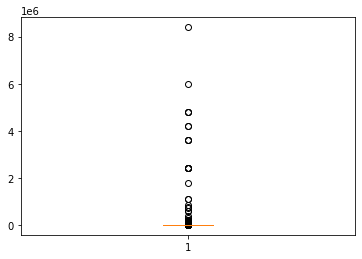

In [28]:
plt.boxplot(datout.price)
sdp_show(datout)

In [38]:
n = [100, 500, 1000, 10000, 100000, 500000, 1000000]
for i in n:
  print('price >', i)
  print('Nº Registros:', len(datout[datout.price>i]))
  print('% del total:', len(datout[datout.price>i])/len(datout)*100)
  print('')

price > 100
Nº Registros: 74259
% del total: 11.924137953182756

price > 500
Nº Registros: 8262
% del total: 1.326670541876351

price > 1000
Nº Registros: 3867
% del total: 0.6209434743931068

price > 10000
Nº Registros: 376
% del total: 0.0603761950793401

price > 100000
Nº Registros: 50
% del total: 0.008028749345656928

price > 500000
Nº Registros: 23
% del total: 0.003693224699002187

price > 1000000
Nº Registros: 18
% del total: 0.0028903497644364945



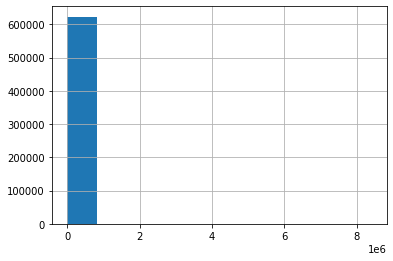

In [39]:
datout.price.hist()

##8.1. `price`

In [40]:
%%capture
# Sustituimos el valor de price de los registros con valor price > 1000€ por la media (sin outliers) de su subcategoría
datout['cat_subc'] = datout.category + str('. ') + datout.subcategory

datout2 = datout
datout2 = datout2[datout2.price < 1000] # Extremos la media sin outliers
price_mean = datout2[['cat_subc', 'price']].groupby('cat_subc').mean()
price_mean = price_mean.add_suffix('_mean').reset_index()

datout = pd.merge(datout, price_mean, how = 'left', on = 'cat_subc')
datout.price[datout.price > 1000] = datout.price_mean

datout.drop(['cat_subc', 'price_mean'], axis = 1, inplace = True)

col_0   count  percent
sold                  
0      414756     66.6
1      208006     33.4
Length: 622762



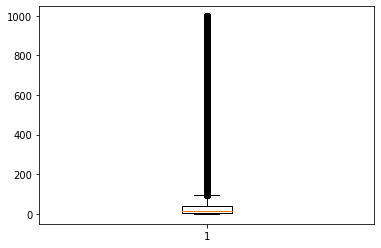

In [41]:
plt.boxplot(datout.price)
sdp_show(datout)

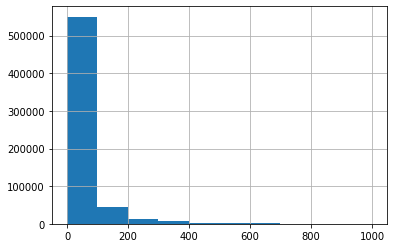

In [43]:
datout.price.hist()

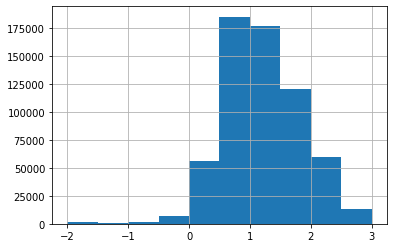

In [42]:
datout.price.apply(m.log10).hist()

#9. Tratamiento de correlaciones
Eliminamos:
* `ratio_population_wage`
* `ratio_wages_fd_region`
* `porc_population_russia`

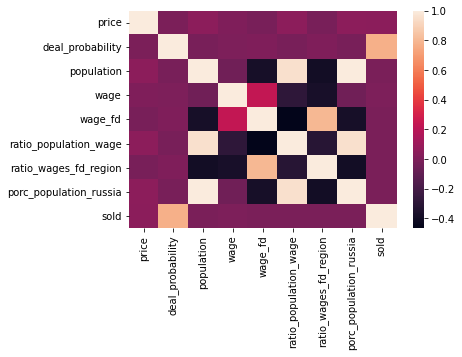

In [ ]:
sns.heatmap(datout.corr())

In [ ]:
# Eliminamos las variables 'ratio_population_wage' y 'porc_population_russia' ya que poseen una correlación muy alta con la variable 'population' y 'ratio_wages_fd_region' con 'wage_fd'
datout.drop(['ratio_population_wage', 'porc_population_russia', 'ratio_wages_fd_region'], axis = 1, inplace = True)

#10. Descarga del dataset final

In [ ]:
datout.to_csv('train_data.csv')
files.download('train_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>